In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from collections import Counter
import re

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flew ATL to LHR 8th Jan 202...
1,Not Verified | Great thing about British Airw...
2,Not Verified | The staff are friendly. The pla...
3,✅ Trip Verified | Probably the worst business ...
4,"✅ Trip Verified | Definitely not recommended, ..."


In [ ]:
#df.to_csv("data/BA_reviews.csv")

In [ ]:
h = []
g = []

In [ ]:
for i in reviews:
  f = i.split("|")
  h.append(f[0])
  g.append(f[1])

In [ ]:
def unique(list1): 
    # initialize a null list
    unique_list = [] 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

In [ ]:
unique(h)

✅ Trip Verified 
Not Verified 
❎ Not Verified 


In [ ]:
Counter(h).values()

dict_values([832, 166, 2])

In [ ]:
len(g)

1000

In [ ]:
len(h)

1000

In [ ]:
#Customer Service 
#Comfort and space
#Great price with great deals
#entertainment 
#inflight meals 

In [ ]:
#cons 
cons=['poor ','uncomfortable','Zero','zero','old','cold','overcooked','undercooked','delayed','vague','worst','Chaos','chaos',
      'Disappointing','disappointing']

In [ ]:
# pros
pros=['great','Great','enjoyed','liked','good','Superb','superb']

In [ ]:
df_review = pd.DataFrame(
    {
     'Reviews': g,
     'Customer_service': g,
     'Comfort_and_space' : g,'inflight_meals': g,'business_class':g
    })

In [ ]:
df1=df_review['Customer_service'].str.contains('delayed |Delayed |busy |chaos |long duartion |long queue |arrogant |rude ',flags=re.IGNORECASE)

In [ ]:
df2=df_review['Comfort_and_space'].str.contains('poor |uncomfortable |old |cold |disappointing |small |no leg-room |no leg room |cramped seats ',flags=re.IGNORECASE)

In [ ]:
df3=df_review['inflight_meals'].str.contains('poor food |cold |overcooked |undercooked |worst food |less quantity |bland |no taste ',flags=re.IGNORECASE)

In [ ]:
df4=df_review['business_class'].str.contains('business class |Business class ',flags=re.IGNORECASE)

In [ ]:
df_final = pd.DataFrame(
    {'V/Nv': h,
     'Reviews': g,
     'Customer_service': df1,
     'Comfort_and_space' : df2,
     'inflight_meals': df3,
     'business_class':df4   
    }
)

In [ ]:
df_final['Customer_service'] = df_final['Customer_service'].map({True: 'True', False: 'False'})
df_final['Comfort_and_space'] = df_final['Comfort_and_space'].map({True: 'True', False: 'False'})
df_final['inflight_meals'] = df_final['inflight_meals'].map({True: 'True', False: 'False'})
df_final['business_class'] = df_final['business_class'].map({True: 'True', False: 'False'})

In [ ]:
df_final['V/Nv'] = df_final['V/Nv'].replace(['✅ Trip Verified ','Not Verified ','❎ Not Verified '],['V','Nv','Nv'])
df_final['Customer_service'] = df_final['Customer_service'].replace(['False','True'],[0,1])
df_final['Comfort_and_space'] = df_final['Comfort_and_space'].replace(['False','True'],[0,1])
df_final['inflight_meals'] = df_final['inflight_meals'].replace(['False','True'],[0,1])
df_final['business_class'] = df_final['business_class'].replace(['False','True'],[0,1])

In [ ]:
def label_race (row):
  if row['business_class']==1:
    if row['Customer_service'] + row['Comfort_and_space'] + row['inflight_meals'] == 3:
      return 'F'
    if row['Customer_service']  + row['Comfort_and_space'] == 2:
      return 'F(C/s,Service)'
    if row['Customer_service']  + row['inflight_meals'] == 2:
      return 'F(Service,Food)'
    if row['Comfort_and_space'] + row['inflight_meals'] == 2:
      return 'F(Food,C/s)'
    if row['Customer_service'] == 1:
      return 'F(service)'
    if row['Comfort_and_space'] == 1:
      return 'F(C/s)'
    if row['inflight_meals'] == 1:
      return 'F(Food)'
    return 'A Business'
  else:
   if row['Customer_service'] + row['Comfort_and_space'] + row['inflight_meals'] == 3:
      return 'D'
   if row['Customer_service'] + row['Comfort_and_space'] + row['inflight_meals'] == 2:
      return 'C'
   if row['Customer_service'] + row['Comfort_and_space'] + row['inflight_meals'] == 1:
      return 'B'
   return 'A'

In [ ]:
df_final['Overall'] = df_final.apply (lambda row: label_race(row), axis=1)

In [ ]:
df_final['Overall'].value_counts()

A                 435
B                 326
C                  82
A Business         72
F(C/s)             59
F(C/s,Service)      9
F(service)          9
F(Food,C/s)         5
D                   2
F                   1
Name: Overall, dtype: int64

In [ ]:
df_final['business_class'].value_counts()

0    845
1    155
Name: business_class, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

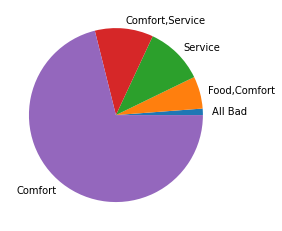

In [ ]:
y = np.array([1.2,6.0,10.85,10.85,71.1])
mylabels = ["All Bad","Food,Comfort","Service", "Comfort,Service", "Comfort"]

plt.pie(y, labels = mylabels)
plt.show() 

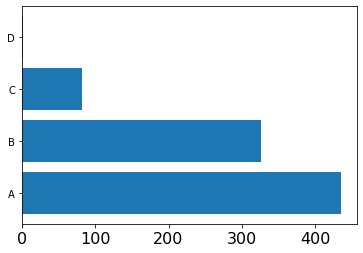

In [ ]:
x = np.array(["A", "B", "C", "D"])
y = np.array([435, 326, 82, 2])

plt.barh(x,y)
plt.show()

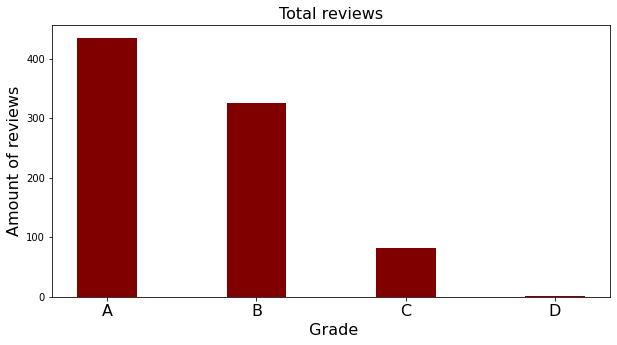

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)
plt.rc('axes', titlesize=16)
plt.rc('xtick', labelsize=16)
plt.rc('axes', labelsize=16)
plt.xlabel(" Grade")
plt.ylabel("Amount of reviews")
plt.title("Total reviews")
plt.show()